# Mini Project 4

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

In the lectures we explored how to delta hedge sold call options, resulting in a trading strategy whose profits are neutral to upward or downward drift in a stock path movements, provided the volatility, or $\sigma$, of the stock remained constant.

For this final mini project explore the impact of a non-constant $\sigma$ on the distribution of profits of hedging. You are also encouraged to explore/research a $\sigma$-hedging strategy and write code that simulates the profit distribution of the $\sigma$-hedging strategy. 

Below is some code you can customize that simulates a stock path whose $\sigma$ is not constant.

You are encouraged to use a different model for sigma then the one provided. You can use stock paths simulated by Heston model? You could use a GARCH model for volatility. The choice is yours and you can do your own research to choose how to model a stock movement. 

In [1]:
#Package Import
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
def bs_call(S0, K, sigma, T=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S0*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)

# $\Delta$ neutral

In [5]:
np.random.seed(0)

S0 = 100.0 # initial spot price
T = 1.0
r = 0.039
mu = 0.275
n_paths = 10000
n_steps = 1000
dt = T/n_steps
K = 100.0 # strike price

t = 0.0
S = S0
sigma = np.random.choice([.2,.3,.45], p = [.5, .3, .2], size = n_paths)
d1 = (np.log(S/K) + (r + 0.5*sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))
hS = norm.cdf(d1)
cash = bs_call(S0, K, sigma, T, r) - hS * S

for _ in range(n_steps-1):
    Z = norm.rvs()
    sigma = np.random.choice([.2,.3,.45], p = [.5, .3, .2], size = n_paths)
    S = S * np.exp((mu - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)
    t = t + dt
    d1 = (np.log(S/K) + (r + 0.5*sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))
    cash = cash * np.exp(r * dt) - (norm.cdf(d1) - hS) * S
    hS = norm.cdf(d1)

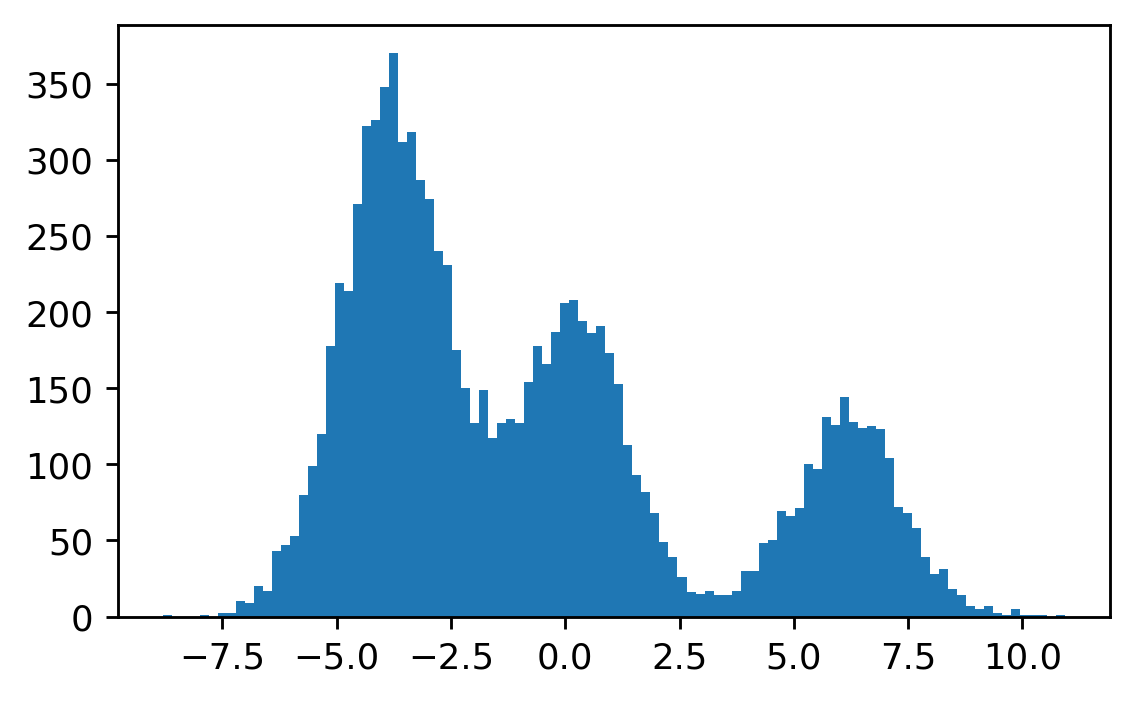

In [6]:
fig, ax = plt.subplots(figsize = (5,3), dpi = 256)

profit = (cash + hS*S) - np.maximum(S - K,0)
ax.hist(profit, bins = 100);

## observations
Tri-modal, corresponding to the three values of $\sigma$.

# vega neutral
$$
\frac{\partial C}{\partial \sigma} = \mathcal{V} = s\varphi(d_1)\sqrt{T-t}
$$

In [7]:
np.random.seed(0)

S0 = 100.0
T = 1.0
r = 0.039
mu = 0.275
n_paths = 10000
n_steps = 1000
dt = T/n_steps
K = 100.0 # strike price

t = 0.0
S = S0
sigma = np.random.choice([.2,.3,.45], p = [.5, .3, .2], size = n_paths)
d1 = (np.log(S/K) + (r + 0.5*sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))
hS = S * norm.pdf(d1) * np.sqrt(T-t)
cash = bs_call(S0, K, sigma, T, r) - hS * S

for _ in range(n_steps-1):
    Z = norm.rvs()
    sigma = np.random.choice([.2,.3,.45], p = [.5, .3, .2], size = n_paths)
    S = S * np.exp((mu - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)
    t = t + dt
    d1 = (np.log(S/K) + (r + 0.5*sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))
    new_hS = S * norm.pdf(d1) * np.sqrt(T-t)
    cash = cash * np.exp(r * dt) - (new_hS - hS) * S
    hS = new_hS

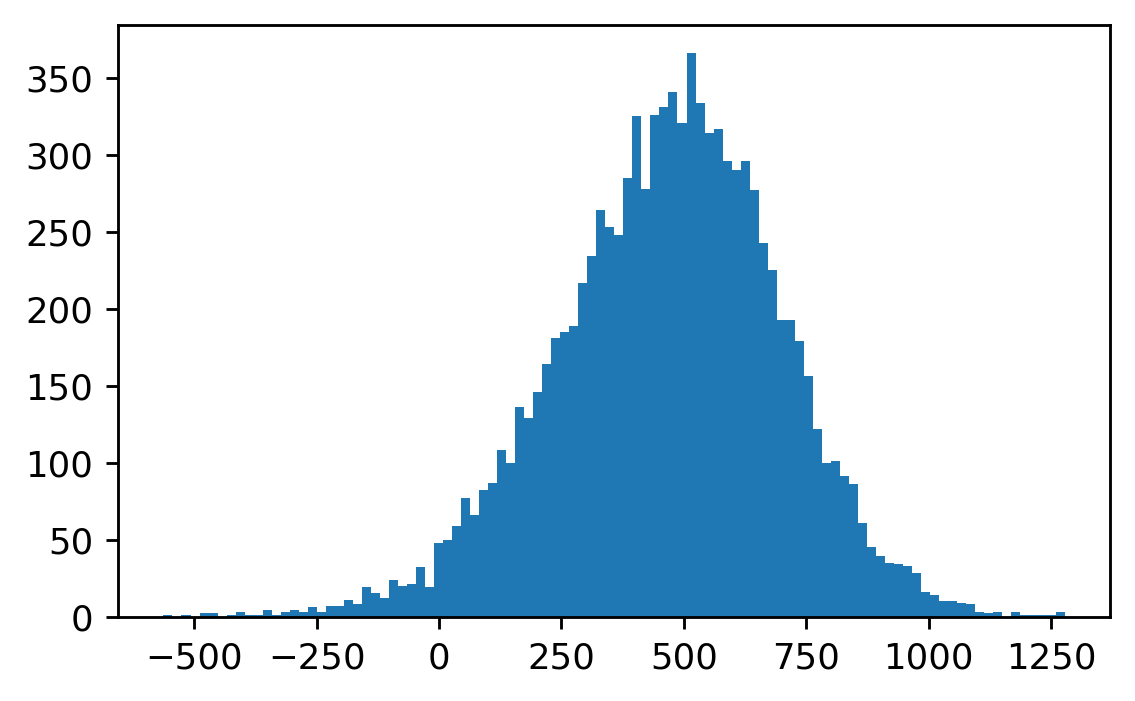

In [8]:
fig, ax = plt.subplots(figsize = (5,3), dpi = 256)

profit = (cash + hS*S) - np.maximum(S - K,0)
ax.hist(profit, bins = 100);

In [9]:
cash + hS*S

array([1008.08649387,  460.56372222,  416.24907824, ...,  526.52382914,
        729.13015578,  868.63221039])